# Project: protection of clients personal data

## Importing the necessary libraries

In [1]:
import pandas as pd

import numpy as np
from numpy.linalg import inv, det

import os

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts

## Loading the data

In [2]:
pth1 = r'C:\Users\exeve\Downloads\insurance.csv'
pth2 = '/datasets/insurance.csv'

if os.path.exists(pth1):
    data = pd.read_csv(pth1)
    
else:   
    data = pd.read_csv(pth2)

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Analyzing the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
# renaming the columns for convenience
data.columns = ['gender', 'age','salary', 'family_members', 'insurance_payments']

In [6]:
data.describe()

,gender,age,salary,family_members,insurance_payments
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


#### Columns overview

In [7]:
def histo(data):
    for column in data:
        sns.histplot(data[column])
        plt.show()


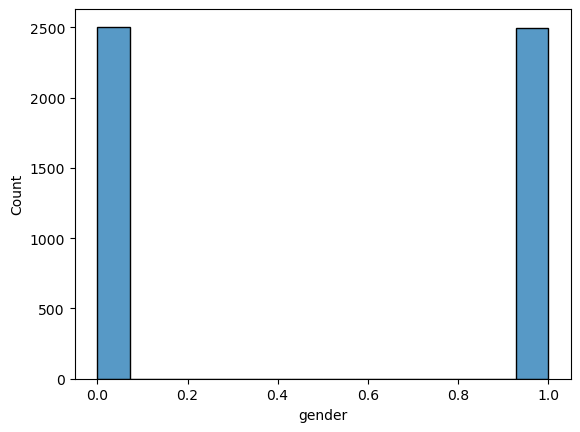

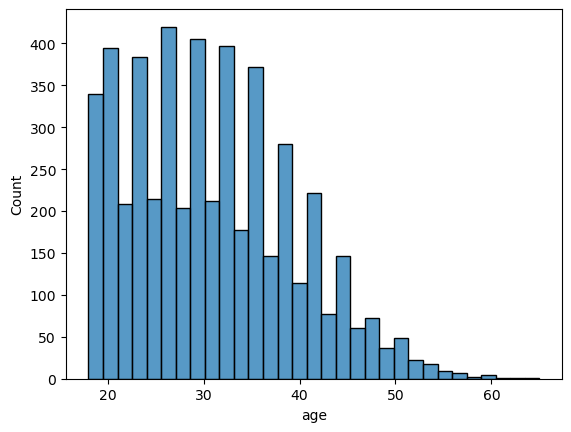

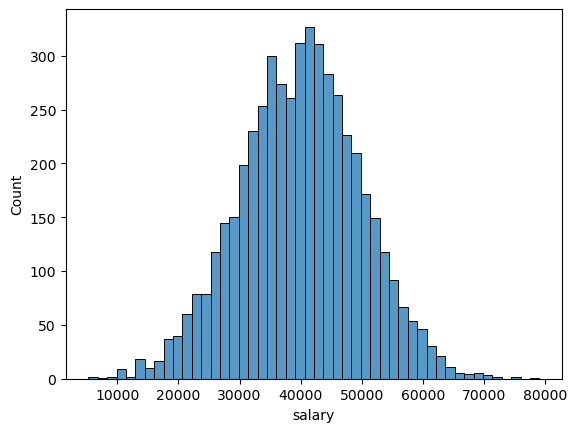

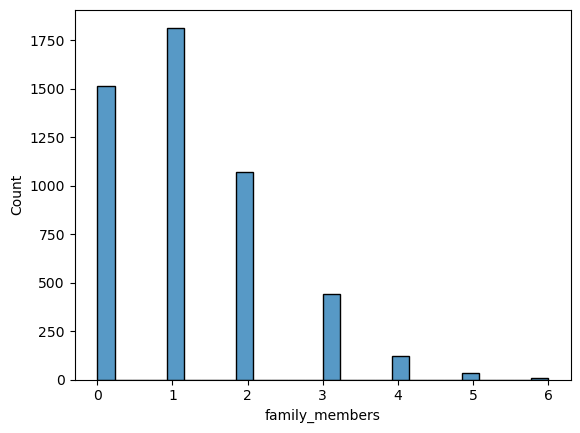

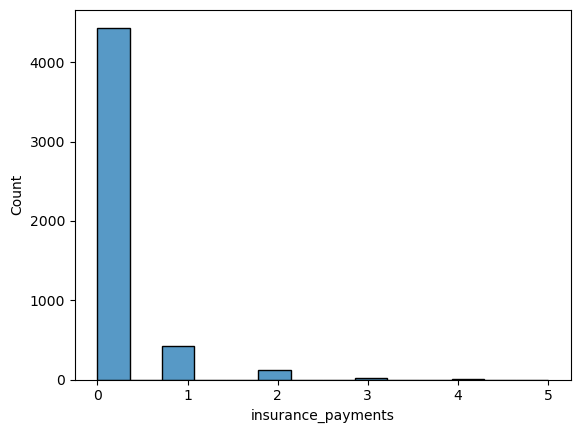

In [8]:
histo(data)

No strange indicators.

#### Duplicates

In [9]:
data.duplicated().sum()

153

In [10]:
data.loc[data.duplicated()]

,gender,age,salary,family_members,insurance_payments
281,1,39.0,48100.0,1,0
488,1,24.0,32900.0,1,0
513,0,31.0,37400.0,2,0
718,1,22.0,32600.0,1,0
785,0,20.0,35800.0,0,0
869,1,24.0,33100.0,1,0
887,1,19.0,35500.0,0,0
1004,1,29.0,42400.0,0,0
1089,0,27.0,46800.0,2,0
1091,1,41.0,34000.0,1,0


There are duplicates, but since we do not have a client id, it is quite possible that these are not duplicates, but simply matching data. We will just leave it as it is.

#### Gaps

In [11]:
data.isna().sum()

gender                0
age                   0
salary                0
family_members        0
insurance_payments    0
dtype: int64

#### Datatype

In [12]:
data['age'] = data['age'].astype('int')
data['salary'] = data['salary'].astype('int')

## Theoretical verification that the quality of the linear regression will not vary after applying the transformation algorithm

Designations:

- $X$ — feature matrix (zero column consists of ones)

- $y$ — target vector

- $P$ — the matrix the features are multiplied by

- $w$ — vector of linear regression weights (zero element equals shift)

Predictions:

$$
a = Xw
$$

Training:

$$
w = \arg\min_w MSE(Xw, y)
$$

Training Formula:

$$
w = (X^T X)^{-1} X^T y
$$

**Rationale:** 

Prediction and training formulas:

$$
a = Xw 
$$

$$
w = (X^TX)^{-1} X^Ty
$$

$$
a = X(X^TX)^{-1} X^Ty
$$





After multiplying a and w by the matrix P, the expressions will be:
$$
w' = ((XP)^TXP)^{-1} (XP)^Ty
$$
$$
a' = XPw'
$$

Let's simplify the expression using the following properties of matrices (**I = identity matrix**):

$$ 
(AB)^T = B^T A^T  
$$
$$
(AB)^{-1} = B^{-1} A^{-1}
$$

$$
AA^{-1} = A^{-1}A = I
$$
$$
AI = IA = A
$$

Simplifying:

$$
w' = ((XP)^TXP)^{-1} (XP)^Ty = (P^TX^TXP)^{-1} P^TX^T y = P^{-1}(P^TX^TX)^{-1}P^TX^T y = P^{-1}(X^TX)^{-1}(P^T)^{-1}P^TX^T y
= P^{-1} (X^TX)^{-1} IX^T y = P^{-1} (X^TX)^{-1} X^T y = P^{-1} w
$$

$$
a = Xw
$$
$$
a' = XP P^{-1} w = Xw = a
$$

- For a change in the quality of linear regression to occur, it must turn out that a ≠ a'. Otherwise, there will be no qualitative change.

- And thus we returned to the original expression, from which it follows that multiplying the matrix X by the invertible matrix P does not make any difference, and so the quality will not change.

## Conversion algorithm

- Proposal of a data transformation algorithm to solve the problem. 
- Explanation of why the quality of the linear regression will not change.

**The algorithm**
- Multiplication of the matrix formed by the features by an invertible matrix of dimension nxn, where n = number of features.

**Rationale**

The result of the scalar product of vectors consisting of several numbers is a single number. It is impossible to derive vectors from a single number. For this reason, encryption is secure. But knowing the encryption matrix the feature matrix was multiplied by, we can obtain the original vectors. To do this, we need to multiply by an invertible matrix, that is, it must be square and its determinant cannot be equal to zero. For a correct multiplication of rows by columns, the dimension of this matrix is determined by the number of features. By multiplying the inverse of the encryption matrix by the encrypted features, we obtain the original features.

## Algorithm verification

- Let's program the algorithm using matrix operations
- Let's check that the quality of the linear regression from sklearn does not differ before and after the transformation.
- Let's apply the R2 metric.

#### Quality before transformation

In [13]:
dada = data

In [14]:
features_X = dada.drop('insurance_payments', axis = 1)
target_X = dada['insurance_payments']

In [15]:
def proof(features, target, title = ''):
    
    features_train, features_test, target_train, target_test = tts(features, target, test_size=0.25, random_state=12345,
                                                                  shuffle = True)
    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions = model.predict(features_test)
    print(title)
    print('R2:', r2_score(target_test, predictions))

In [16]:
proof(features_X, target_X, 'Quality before transformation:')

Quality before transformation:
R2: 0.43522756840832666


#### Quality after transformation

In [17]:
# Creating an encryption matrix
P = np.random.randint(20, size = (data.shape[1]-1, data.shape[1]-1))

# inverse matrix for verification
Pinv = inv(P)

# verifying AA**(-1) = I
np.allclose(np.dot(P,Pinv), np.eye(data.shape[1]-1))

True

In [18]:
# if the determinant of the matrix is not 0 then the matrix is invertible
print(det(P))

8306.999999999995


In [19]:
# features for transformation
X = data.drop('insurance_payments', axis = 1)

# we leave the target without transformation because it’s still 
# impossible to find out who it belongs to, because the features are encrypted 
target_Z = data['insurance_payments']

# transforming the features by multiplying them by the encryption matrix 
Z = X @ P

In [20]:
proof(Z, target_Z, 'Quality afer transformation:')

Quality afer transformation:
R2: 0.43522756840832333


#### Decoding


$$
XP = Z -> X = XI = XPP^{-1} = ZP^{-1}
$$

- In order to find the initial values of the features, we would multiply the encrypted values by the inverse matrix of the encryption matrix.
- If the data from "data" matches the data from "inception", then the encryption works correctly.

In [21]:
data.head()

,gender,age,salary,family_members,insurance_payments
0,1,41,49600,1,0
1,0,46,38000,1,1
2,0,29,21000,0,0
3,0,21,41700,2,0
4,1,28,26100,0,0


In [22]:
inception = pd.DataFrame(Z @ Pinv).join(target_Z)

inception.columns = data.columns
feat = ['gender', 'age', 'salary', 'family_members']
inception[feat] = inception[feat].round().astype('int')

inception.head()

,gender,age,salary,family_members,insurance_payments
0,1,41,49600,1,0
1,0,46,38000,1,1
2,0,29,21000,0,0
3,0,21,41700,2,0
4,1,28,26100,0,0


## Conclusion

- We have found an encryption algorithm to encrypt customer data.

- We showed that, as we expected in theory, the quality of the model before and after encryption does not change in practice.